# Neural Networks and Support Vector Classifier

In [1]:
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, linear_model, datasets
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
%matplotlib inline

In [2]:
# new dataset, handwritten digits!
digits = datasets.load_digits()
digits.data

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [3]:
len(digits.data)      # 1,797 observations

1797

In [4]:
len(digits.data[0])   # 8 x 8 pixel image

64

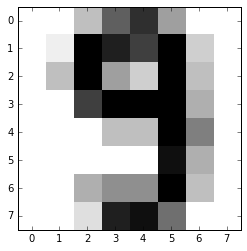

In [5]:
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
# the number 9
plt.show() 

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [7]:
len(digits.target)

1797

In [ ]:
digits.target[-5]
# 9

In [8]:
digits_X, digits_y = digits.data, digits.target

Manual page for scikit-learn neural network models (unsupervised): http://scikit-learn.org/stable/modules/neural_networks.html#neural-network

In [9]:
rbm = BernoulliRBM(random_state=0)
rbm.fit(digits_X, digits_y,)
biases_for_visible = rbm.intercept_visible_
print biases_for_visible.shape
print biases_for_visible

(64,)
[ -6.00000000e-02  -5.00000000e-02   7.56141429e+02   1.94975857e+03
   1.95214714e+03   8.59607143e+02   6.49571429e+01  -6.00000000e-02
  -9.00000000e-02   1.78050000e+02   1.68913857e+03   1.97691714e+03
   1.66985429e+03   1.29152143e+03   1.51935714e+02  -6.00000000e-02
  -9.00000000e-02   2.87592857e+02   1.60319714e+03   1.07963000e+03
   1.09696429e+03   1.22640429e+03   1.42145714e+02  -4.00000000e-02
  -6.00000000e-02   2.64097143e+02   1.45647000e+03   1.40794000e+03
   1.60669286e+03   1.18004000e+03   2.37192857e+02  -5.00000000e-02
  -5.00000000e-02   2.40911429e+02   1.19994000e+03   1.45312143e+03
   1.67425000e+03   1.39458429e+03   3.43288571e+02  -9.00000000e-02
  -5.42857143e-02   1.05241429e+02   1.05928714e+03   1.12106000e+03
   1.20093571e+03   1.30409286e+03   4.41502857e+02  -6.42857143e-02
  -7.00000000e-02   9.71428571e-02   1.17162143e+03   1.53707857e+03
   1.51540429e+03   1.39770857e+03   4.89664286e+02  -5.42857143e-02
  -6.00000000e-02  -4.857142

In [10]:
biases_for_hidden = rbm.intercept_hidden_
print biases_for_hidden.shape
print biases_for_hidden

(256,)
[-0.4185957  -0.41468065 -0.44510937 -0.42795734 -0.43116595 -0.43916357
 -0.41939128 -0.43695791 -0.44714664 -0.44555147 -0.45309454 -0.43966119
 -0.42488124 -0.43439961 -0.41278826 -0.40784665 -0.42201321 -0.41897008
 -0.40828774 -0.43584587 -0.44419539 -0.42669712 -0.43270248 -0.42850354
 -0.41543742 -0.42986366 -0.42656096 -0.42903535 -0.43843143 -0.4290297
 -0.42980751 -0.42588446 -0.41289483 -0.44485588 -0.43041131 -0.42631045
 -0.42178625 -0.42456129 -0.43291797 -0.44354722 -0.43771502 -0.42390589
 -0.45439418 -0.41845123 -0.42117939 -0.43830613 -0.44542174 -0.43355636
 -0.44936278 -0.43119948 -0.42280076 -0.44604897 -0.42516998 -0.42929779
 -0.40107953 -0.4275106  -0.43642668 -0.42014958 -0.42850786 -0.43653862
 -0.42622282 -0.4388206  -0.42622109 -0.44951304 -0.43253721 -0.4286169
 -0.43200131 -0.43397446 -0.4284476  -0.40379277 -0.42266687 -0.44506055
 -0.43273355 -0.41719743 -0.41370822 -0.40508068 -0.42734299 -0.4151608
 -0.42628911 -0.43474809 -0.4468829  -0.4230673

In [11]:
weights = rbm.components_
print weights.shape
print weights

(256, 64)
[[ -2.22448454e-02  -1.61637738e-02   7.55975541e+02 ...,   1.03706115e+03
    1.91242405e+02  -4.22269170e-02]
 [ -3.90567680e-02  -2.48918880e-02   7.55969396e+02 ...,   1.03711773e+03
    1.91255653e+02  -7.90376257e-03]
 [ -3.33169025e-02  -1.58918236e-02   7.55785854e+02 ...,   1.03689318e+03
    1.91208597e+02  -2.20895443e-02]
 ..., 
 [ -3.82082837e-02  -1.22235595e-02   7.55959375e+02 ...,   1.03703013e+03
    1.91240331e+02  -4.56073812e-02]
 [ -4.50824320e-02  -2.41067006e-02   7.56037269e+02 ...,   1.03716900e+03
    1.91263605e+02  -2.66076496e-02]
 [ -3.77843496e-02  -2.11431500e-02   7.55887500e+02 ...,   1.03701326e+03
    1.91236311e+02  -1.57504619e-02]]


In [12]:
# use an unsupervised artifical neural network to ascertain feature
rbm = BernoulliRBM(random_state=0)
logistic = linear_model.LogisticRegression()
classifier = Pipeline(steps=[('rbm', rbm), ('logistic', logistic)])
# We can use a pipeline to do two things at once. Use the neural network to find features
# and use a logistic regression to classify


In [13]:
cross_val_score(classifier, digits_X, digits_y, cv=5, scoring='accuracy').mean()
# OOF! Not so great...

0.10183423001815592

In [14]:
# Ok but what if we just use logistic regression without first getting new features?
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, digits_X, digits_y, cv=5, scoring='accuracy').mean()
# OK not bad!!!

0.92101881133607011

## SVMs - Support Vector Classifier

Manual page for scikit-learn SVC: http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

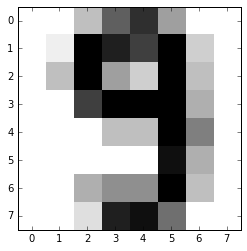

In [15]:
# Let's try a SVM classifier
clf = svm.SVC()
clf.fit(digits_X, digits_y)
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')

In [16]:
clf.predict(digits.data[-5])
# WOOHOO

array([9])

In [17]:
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

# OOF again, we lost to the logistic regression...
# This estimator defaults to the Gaussian (aka radial basis function)
# let's try something else

0.44878680061604637

### Guassian has two parameters, gamma and C

Intuitively, the gamma parameter defines how far the influence of a 
single training example reaches, with low values meaning ‘far’ and 
high values meaning ‘close’. 

* small gamma: The model is constrained, can under-fit!
* big gamma: Tries to capture the shape too well: can over-fit!


* small C: Makes the decision surface smooth and simple, can under-fit!
* big C: Selects more support vectors: can over-fit!


In [18]:
# note the scale of gamma and C
clf = svm.SVC(gamma=0.001, C=1)
cross_val_score(clf, digits_X, digits_y, cv=5, scoring='accuracy').mean()

# Skadoosh!


0.9716361987950688

In [19]:
# import some data to play with
iris = datasets.load_iris()
iris_X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
iris_y = iris.target

In [20]:
# Start with logistic Regression
logistic = linear_model.LogisticRegression()
cross_val_score(logistic, iris_X, iris_y, cv=5, scoring='accuracy').mean()

0.76666666666666672

In [21]:
# Let's try a SVM
clf = svm.SVC()
cross_val_score(clf, iris_X, iris_y, cv=5, scoring='accuracy').mean()

0.81999999999999995

### Let's compare three SVMs with different kernels

* Radial Bias Function (RBF)
* Linear
* Poly of degree 3

In [23]:
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(iris_X, iris_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(iris_X, iris_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(iris_X, iris_y)

In [24]:
# create a mesh to plot in
x_min, x_max = iris_X[:, 0].min() - 1, iris_X[:, 0].max() + 1
y_min, y_max = iris_X[:, 1].min() - 1, iris_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

In [26]:
# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

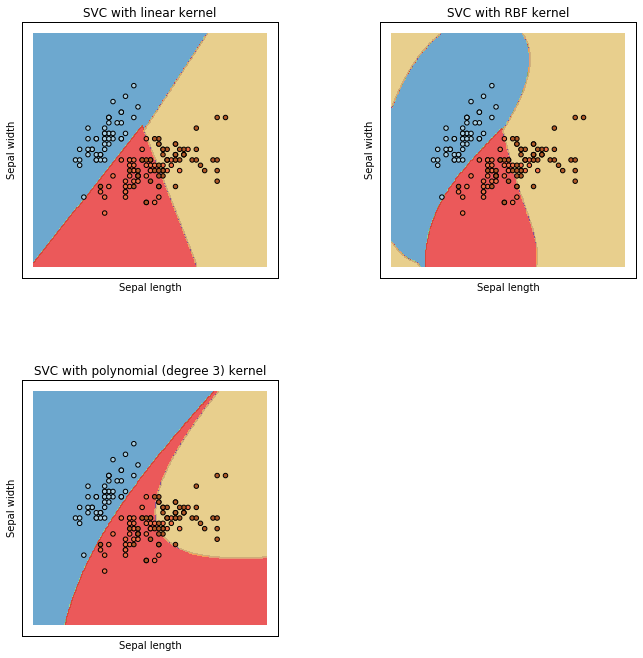

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 11  # set plot size

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(iris_X[:, 0], iris_X[:, 1], c=iris_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

In [29]:
print 'SVC with linear kernel score: ',cross_val_score(svc, iris_X, iris_y, cv=10, scoring='accuracy').mean()
print 'SVC with RBF kernel score: ',cross_val_score(rbf_svc, iris_X, iris_y, cv=10, scoring='accuracy').mean()
print 'SVC with polynomial (degree 3) kernel score: ',cross_val_score(poly_svc, iris_X, iris_y, cv=10, scoring='accuracy').mean()

SVC with linear kernel score:  0.813333333333
SVC with RBF kernel score:  0.806666666667
SVC with polynomial (degree 3) kernel score:  0.8


### Lets try SVC on some different data

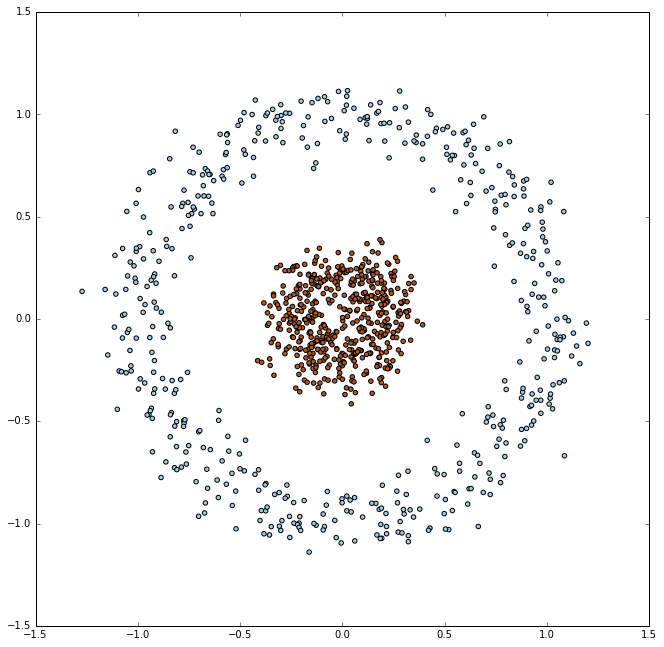

In [30]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
cm = cmap=plt.cm.Paired
plt.scatter(circles_X[:,0], circles_X[:,1], c=circles_y, cmap=cm)

In [ ]:
circles_y

In [32]:
# let's predict them without graphs
logreg = LogisticRegression()
cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()


0.48899999999999999

In [33]:
clf = svm.SVC(kernel = 'linear')        # I like lines
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()


0.65200000000000002

In [36]:
clf = svm.SVC(kernel = 'poly', degree = 3)        # I like 3rd degree polys
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()

0.56699999999999995

In [37]:
clf = svm.SVC(kernel = 'rbf')           # I like circles
cross_val_score(clf, circles_X, circles_y, cv=5, scoring='accuracy').mean()


1.0

#### The radial basis function kernel projects the data into higher dimensions that accompany circles well

OK now with graphs


In [50]:
logreg.fit(circles_X, circles_y)
C = 1.0  # SVM regularization parameter
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(circles_X, circles_y)  # default kernel
svc = svm.SVC(kernel='linear', C=C).fit(circles_X, circles_y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(circles_X, circles_y)

In [47]:
# create a mesh to plot in
x_min, x_max = circles_X[:, 0].min() - 1, circles_X[:, 0].max() + 1
y_min, y_max = circles_X[:, 1].min() - 1, circles_X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                     np.arange(y_min, y_max, .02))

In [48]:
# title for the plots
titles = ['Logistic Regression ',
          'SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'SVC with RBF kernel']

Logistic Regression score:  0.489
SVC with linear kernel score:  0.652
SVC with polynomial (degree 3) kernel score:  0.983
SVC with RBF kernel score:  1.0


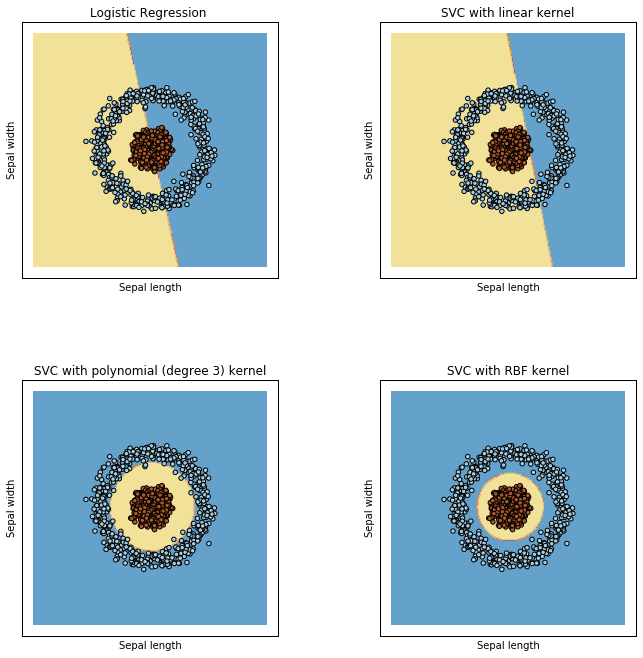

In [49]:
print 'Logistic Regression score: ',cross_val_score(logreg, circles_X, circles_y, cv=5, scoring='accuracy').mean()
print 'SVC with linear kernel score: ',cross_val_score(svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()
print 'SVC with polynomial (degree 3) kernel score: ',cross_val_score(poly_svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()
print 'SVC with RBF kernel score: ',cross_val_score(rbf_svc, circles_X, circles_y, cv=5, scoring='accuracy').mean()


for i, clf in enumerate((logreg, svc, poly_svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    # Plot also the training points
    plt.scatter(circles_X[:, 0], circles_X[:, 1], c=circles_y, cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()

#### a real thing of beauty

<pr>
### Bonus: Visualize C

Intuitively, the gamma parameter defines how far the influence of a 
single training example reaches, with low values meaning ‘far’ and 
high values meaning ‘close’. 

* small gamma: The model is constrained, can under-fit!
* big gamma: Tries to capture the shape too well: can over-fit!


* small C: Makes the decision surface smooth and simple, can under-fit!
* big C: Selects more support vectors: can over-fit!


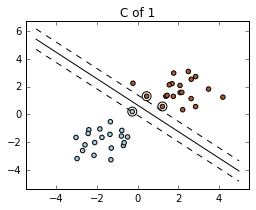

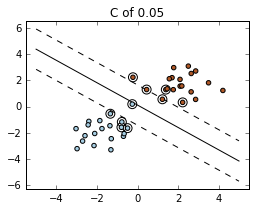

In [54]:
# Visualizing different C

X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('C of 1', 1), ('C of 0.05', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    plt.title(name)

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    fignum = fignum + 1

plt.show()


* small C: can under-fit!
* big C: can over-fit!
